In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## DEBUG

In [7]:
logger = pd.read_csv('data_20211205/Suzuki-21_20211205_170115.csv', skiprows=17, names=["Time","Distance","ECU_LAMBDA1","ECU_TPS","ECU_ENG_T","ECU_V_BATT","ECU_RPM","ECU_VEH_SPD","ECU_OIL_P","ECU_BRK_P"], encoding='iso-8859-1', index_col=False)

In [8]:
logger

,Time,Distance,ECU_LAMBDA1,ECU_TPS,ECU_ENG_T,ECU_V_BATT,ECU_RPM,ECU_VEH_SPD,ECU_OIL_P,ECU_BRK_P
0,0.00,0.0,2.98,0,22,11.50,0,0.0,0,0
1,0.05,0.0,2.98,0,22,11.50,0,0.0,0,0
2,0.10,0.0,2.98,0,22,11.50,1816,0.0,0,0
3,0.15,0.0,2.98,0,22,11.50,2048,0.0,0,0
4,0.20,0.0,2.98,0,22,11.50,2104,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
575,28.75,0.0,1.66,0,23,14.48,1384,0.0,1,0
576,28.80,0.0,1.66,0,23,14.48,1312,0.0,1,0
577,28.85,0.0,1.66,0,23,14.48,1224,0.0,1,0
578,28.90,0.0,1.66,0,23,14.48,1176,0.0,1,0


In [9]:
arduino_debug = pd.read_csv('data_20211205/raw_test_211205.csv', sep=';', names=['Time', "ECU_ENG_T", "ECU_V_BATT", "ECU_LAMBDA1", "ECU_OIL_P", "ECU_BRK_P", "ECU_TPS"], skiprows=91)
arduino_debug.Time -= arduino_debug.Time.iloc[0]

In [14]:
THERMISTOR_R1 = 1800.0
BETA_VALUE = 3812.0
BETA_TEMP = 298.15
BETA_R = 1980.0

def NTC2TEMP(x):
    if not np.isnan(x):
        NTC_R = (THERMISTOR_R1 * x) / (1023.0 - x)
        Tk =  1.0 / ((1.0 / BETA_TEMP) - (np.log(BETA_R / NTC_R) / BETA_VALUE))
        return round((Tk - 273.15) * 10) / 10

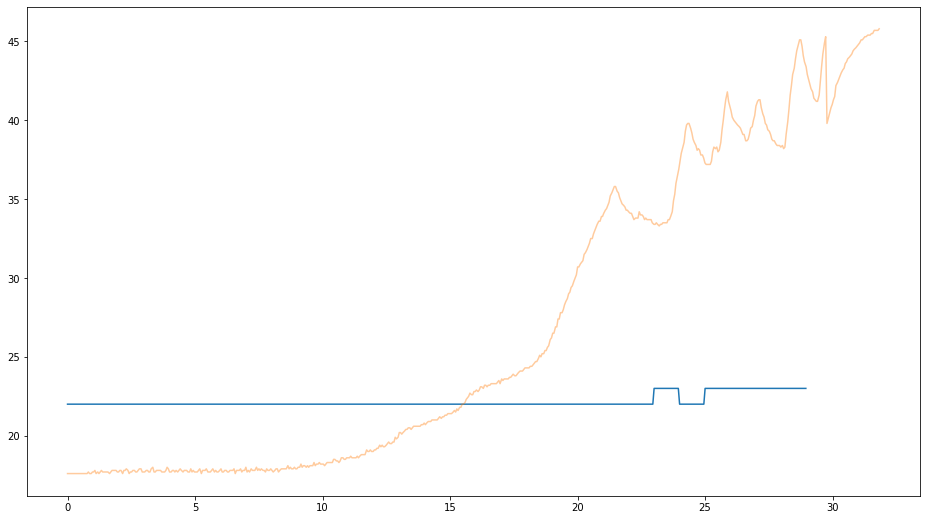

In [19]:
plt.figure(figsize=(16,9))
#plt.plot(arduino_debug.Time, arduino_debug.ECU_LAMBDA1 / 210)
plt.plot(logger.Time, logger.ECU_ENG_T)
plt.plot(arduino_debug.Time, arduino_debug.ECU_ENG_T.apply(NTC2TEMP), alpha=0.4)

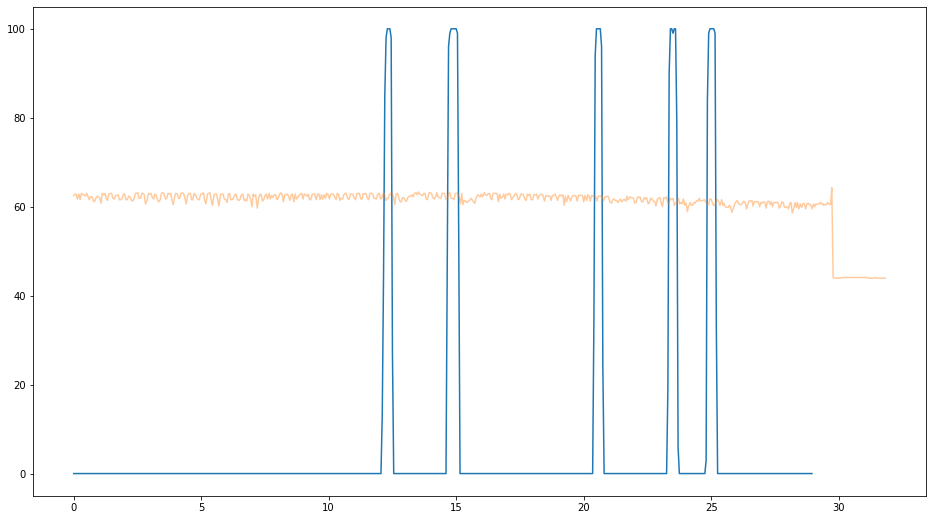

In [35]:
plt.figure(figsize=(16,9))
#plt.plot(arduino_debug.Time, arduino_debug.ECU_LAMBDA1 / 210)
plt.plot(logger.Time, logger.ECU_TPS)
plt.plot(arduino_debug.Time, (arduino_debug.ECU_TPS - 160) / (795 - 160) * 100, alpha=0.4)